In [989]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import  variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [990]:
Bike_sharing_data= pd.read_csv("day.csv")
Bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [991]:
# Check the shape of the data 

Bike_sharing_data.shape

(730, 16)

In [992]:
# Check the information of the data set 
Bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### The above result shows that there are no null values in any columns and all numerical information is in numerical 
#### data type only and no data tpye conversions are necessary

In [993]:
# Checking statistical information of the data 
Bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Prearing the data
#### The "instant" column is an index column 
#### The "casual" column and the "registered" columns are together represented by the "cnt" column 
#### Hence these 3 columns can be dropped

In [994]:
# Dropping the "instant", "casual", and "registered" columns 

Bike_sharing_data.drop(["instant","casual","registered"], axis = 1, inplace = True)


In [995]:
Bike_sharing_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### This dataset has bike sharing trends data records from jan 1st 2018 upto dec 31 st of 1029
#### The "dteday" is a column that has the date of each record in proper chronological order.
#### I shall retain this column converting it into day numbers to check if, as time passes by 
#### and the bussiness gains popularity does it have any effect on the target variable

In [996]:
Bike_sharing_data['day_number'] = (pd.to_datetime(Bike_sharing_data['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [997]:
Bike_sharing_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_number
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [998]:
# Now dropping the "dteday" column as we have the data from that column as day number in the "day_number" column
Bike_sharing_data.drop(["dteday"], axis = 1, inplace = True)

In [999]:
Bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_number
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


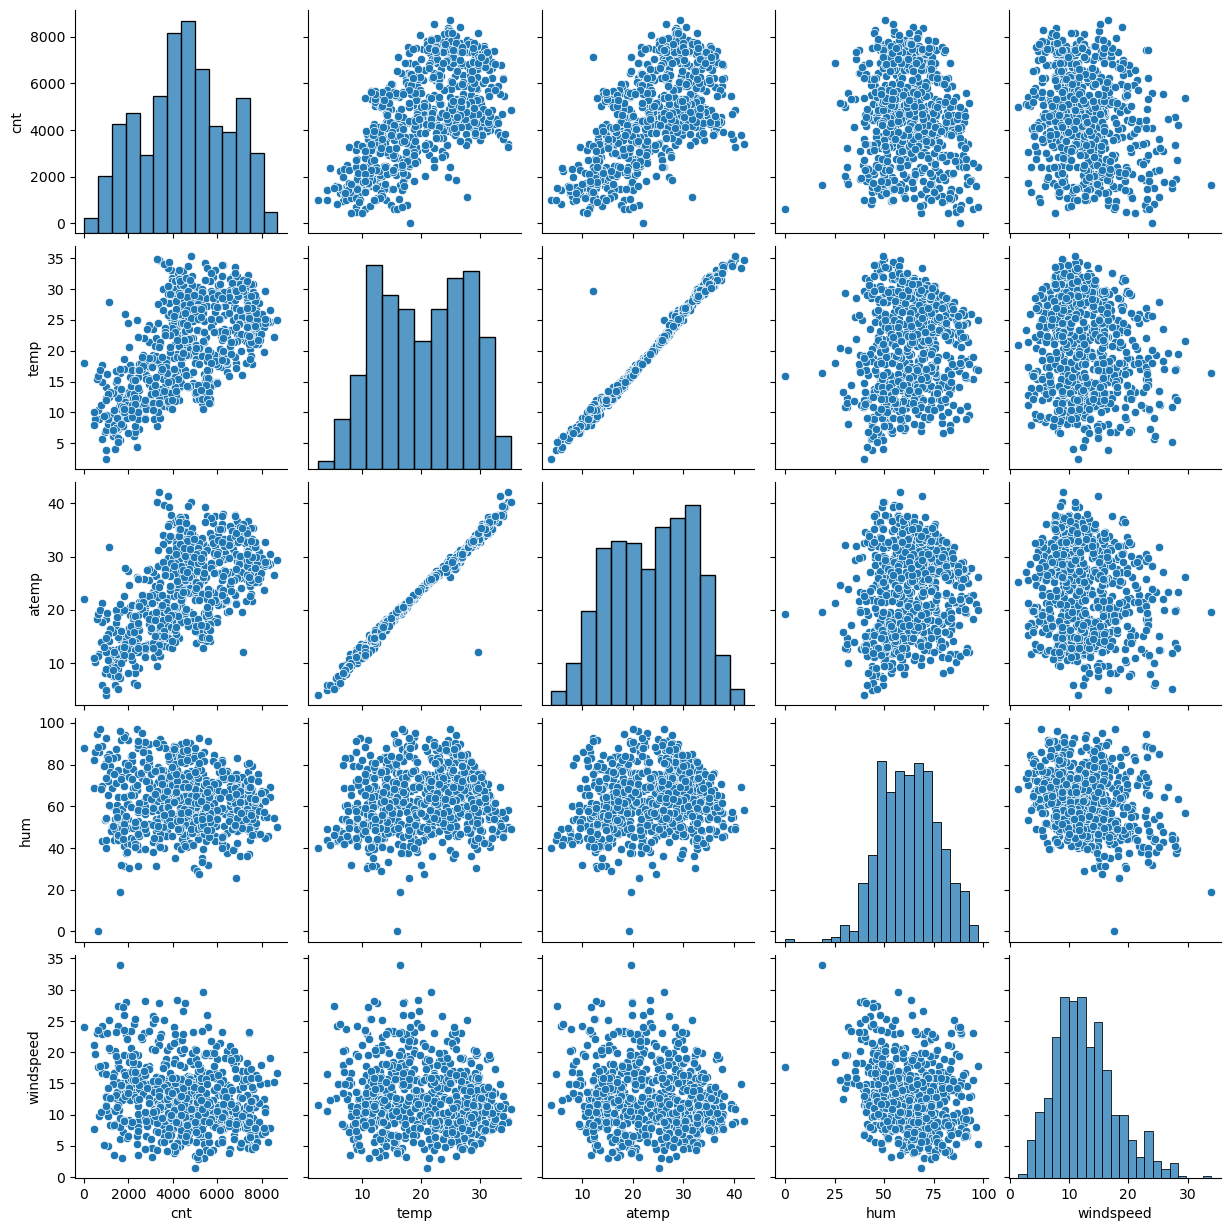

In [1000]:
# plotting a pair plot between numerical variables and the target variable to see if there is any linear relationship

sns.pairplot(data=Bike_sharing_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Inference : There seems to be a linear relationship between atemp and temp column with the cnt variable
#### Hence we can proceed with building a linear regression model

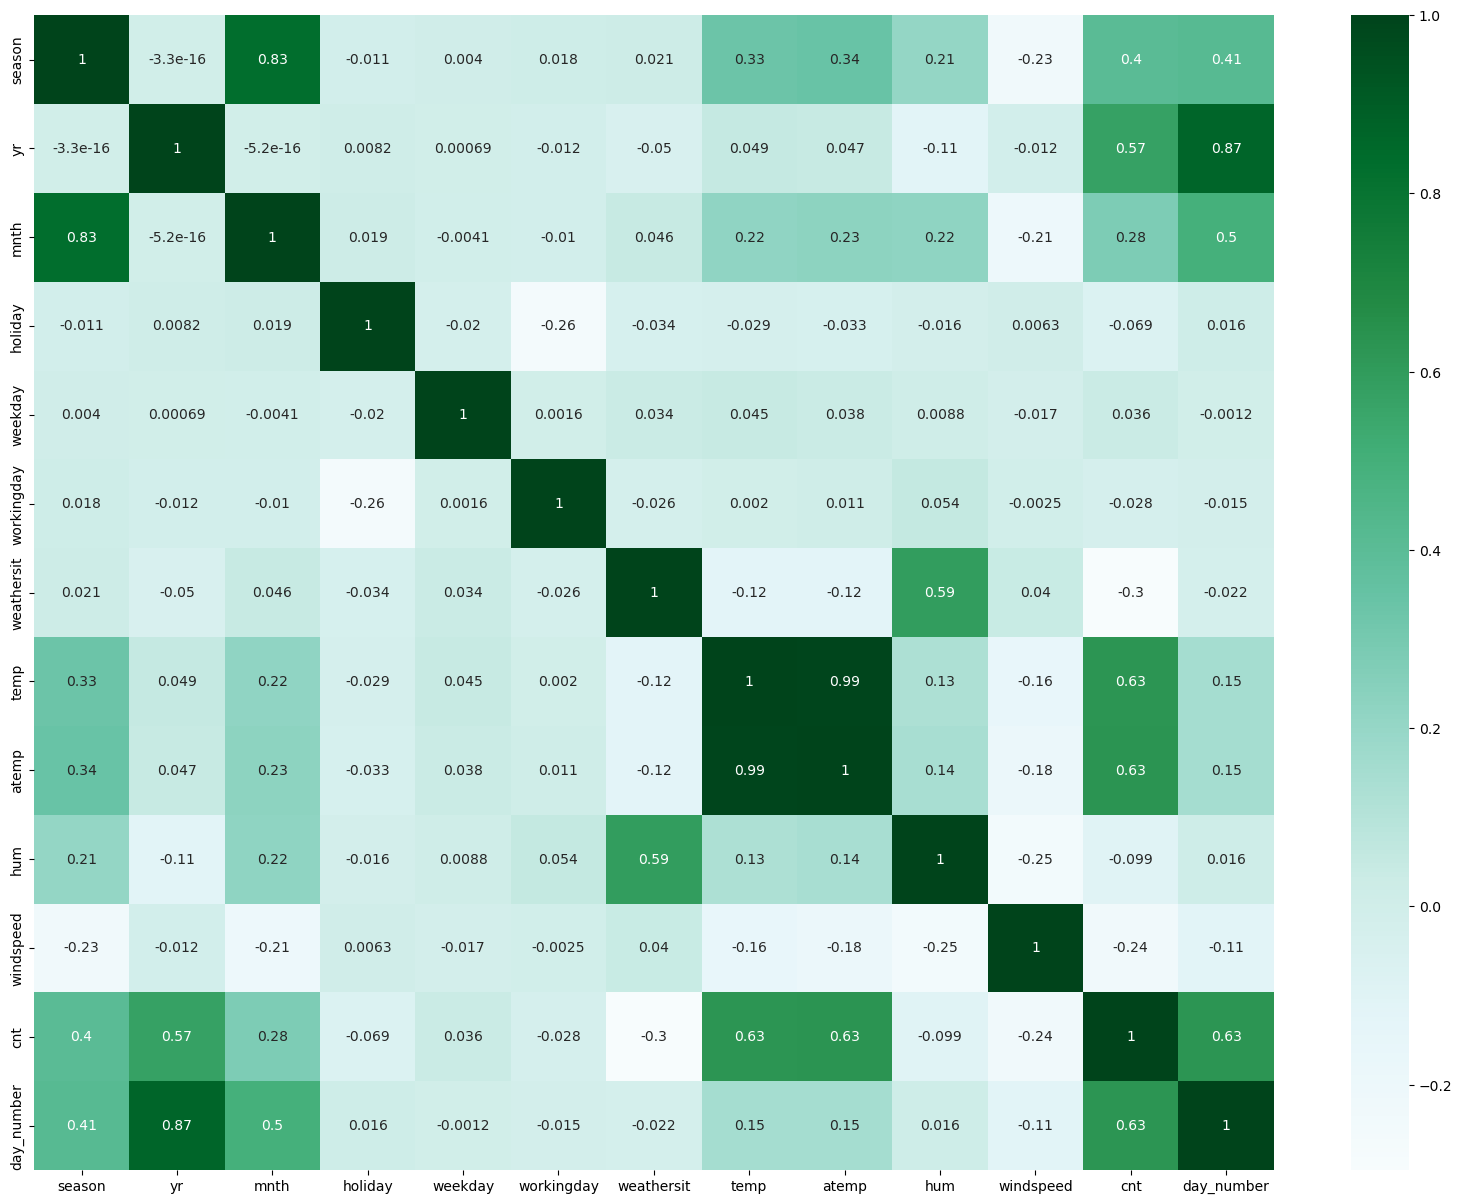

In [1001]:
# plotting a heatmap for the correlations between all the variables 

cor=Bike_sharing_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap="BuGn", annot = True)
plt.show()

In [1002]:
# From the above heatmap we can conlcude that there is a good correlation between target variable many independent variables 
# This is another Good sign that building a liner regression model to expalin the variance in the target variable is possible

In [1003]:
# Preparing the categorical variables for the model building process
# Replacing the numerical information with the respective categorical information as given in the "Data Dictionary"


Bike_sharing_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

Bike_sharing_data.weathersit.replace({1:'CLear or Partly cloudy',2:'Cloudy with mist',3:'Light snow or Light rain',4:'Heavy rain or snow and fog'},inplace = True)

Bike_sharing_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace = True )

Bike_sharing_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace= True)

Bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_number
0,spring,0,jan,0,mon,1,Cloudy with mist,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,Cloudy with mist,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,CLear or Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,CLear or Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,CLear or Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600,4


In [1004]:
# Exploratory data analysis between the categorical variables and the target variable to observe and trends


categorical_vars_list = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
cat_vars_df = Bike_sharing_data[categorical_vars_list]
cat_vars_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,jan,0,mon,1,Cloudy with mist
1,spring,0,jan,0,tue,1,Cloudy with mist
2,spring,0,jan,0,wed,1,CLear or Partly cloudy
3,spring,0,jan,0,thu,1,CLear or Partly cloudy
4,spring,0,jan,0,fri,1,CLear or Partly cloudy


<Figure size 1500x1500 with 0 Axes>

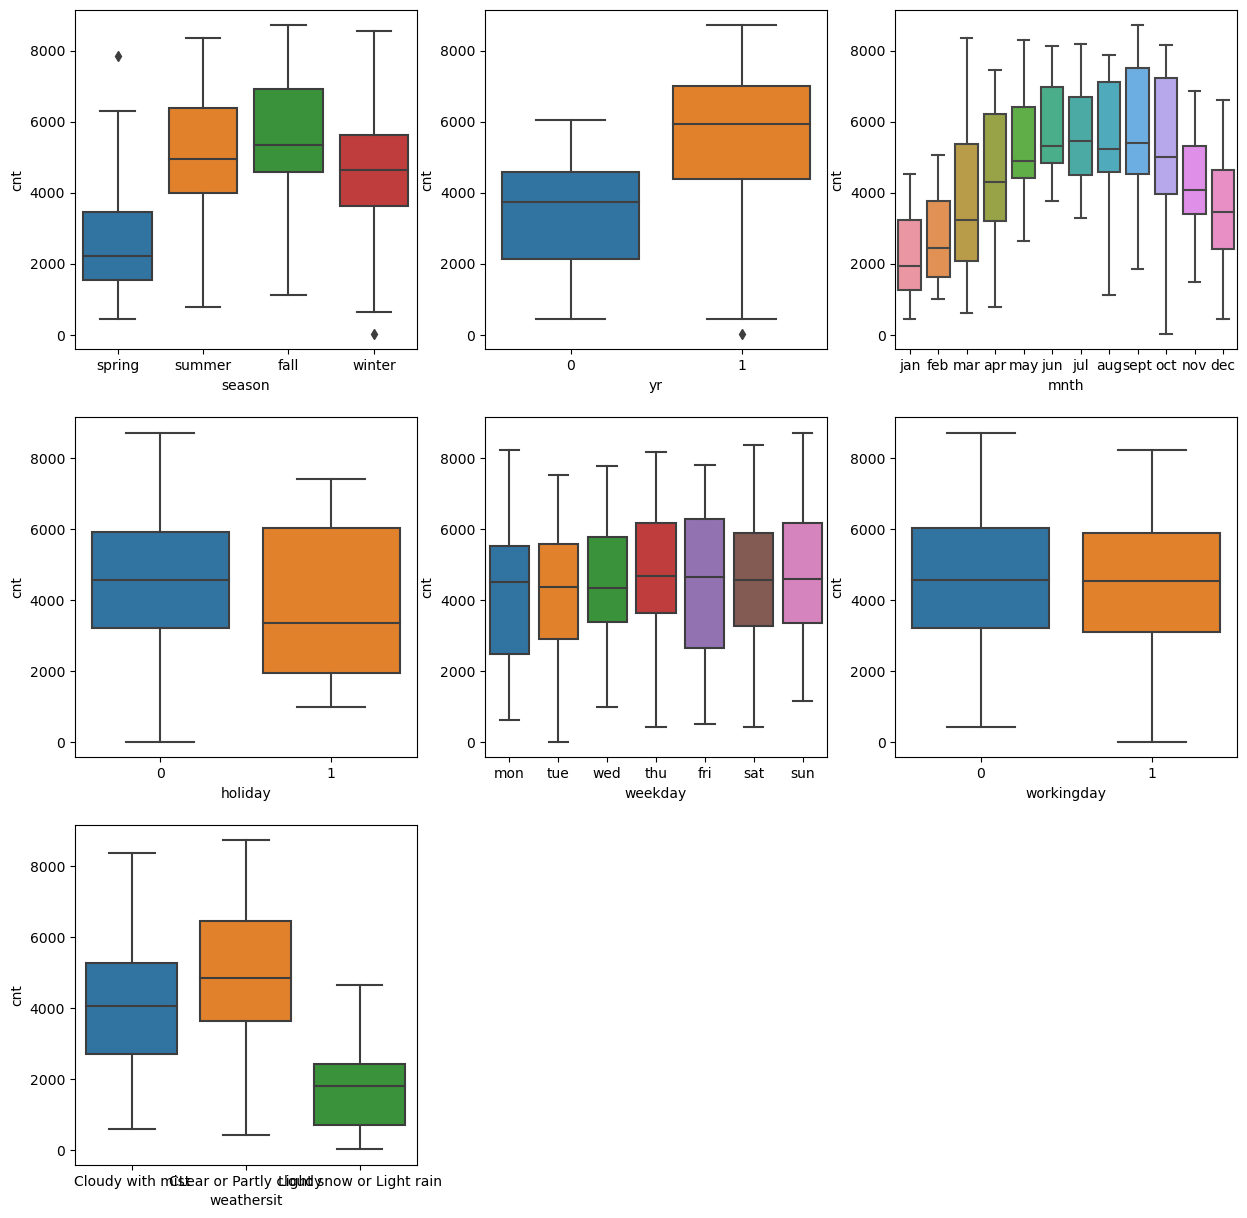

In [1005]:
plt.figure(figsize=(15, 15))

categorical_vars_list = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in range(0,len(categorical_vars_list)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = categorical_vars_list[i], y = 'cnt', data = Bike_sharing_data)
plt.show()

#### Inferences : 
   #### 1) The count of bike hiring has increased from 2018 to 2019 
   #### 2) There is a good demand in the fall season , so the company can promote their brand and be well prepared for this season
   #### 3) In the months on august to october there is a good trend in the demand for shared bikes
   #### 4) Also there is good demand during good weather conditions 

## Data preparation for building linear regression model

#### Creating dummy variables for the categorical variables

In [1006]:
Bike_sharing_data = pd.get_dummies(data=Bike_sharing_data,columns=["season","mnth","weekday","weathersit"],drop_first=True,dtype="int32")

# Here we are dropping the first columns as n-1 dummy variables are sufficient to explain n categorical levels

In [1007]:
Bike_sharing_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_number,season_spring,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Cloudy with mist,weathersit_Light snow or Light rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,0,0


In [1008]:
Bike_sharing_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'day_number', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Cloudy with mist',
       'weathersit_Light snow or Light rain'],
      dtype='object')

In [1009]:
Bike_sharing_data.shape

(730, 31)

####  Splitting the data into train and test sets

In [1010]:
df_train , df_test = train_test_split(Bike_sharing_data , train_size=0.7 , random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


#### Rescaling the features 

In [1011]:
# Steps in rescaling

# 1. Instantiate an object 
scaler = MinMaxScaler()

#  Create a list of variables that need to scaled ie  the numeric variables
num_vars = ["temp", "atemp" , "hum" , "windspeed" , "day_number", "cnt"]

# 2. Fit on data 
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_number,season_spring,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Cloudy with mist,weathersit_Light snow or Light rain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.791209,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.585165,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.662088,0,...,0,0,0,0,1,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0.152473,0,...,0,0,0,0,1,0,0,0,1,0


In [1012]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_number,season_spring,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Cloudy with mist,weathersit_Light snow or Light rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.505055,0.243137,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.287907,0.429398,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.255838,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.510989,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.757898,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the model 

#### Since there are many variables , we shall use RFE to select the variables initially 



In [1013]:
# We shall devide the train data set into X and y 

y_train = df_train.pop('cnt')
X_train = df_train

In [1014]:
# Running RFE with the output number of variables  equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE

rfe = RFE(lm, step=15) 
rfe = rfe.fit(X_train, y_train)

In [1015]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day_number', True, 1),
 ('season_spring', False, 2),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 2),
 ('mnth_jun', False, 2),
 ('mnth_mar', False, 2),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_Cloudy with mist', True, 1),
 ('weathersit_Light snow or Light rain', True, 1)]

In [1016]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'day_number', 'season_winter', 'mnth_jan', 'mnth_sept', 'weekday_sat',
       'weekday_sun', 'weathersit_Cloudy with mist',
       'weathersit_Light snow or Light rain'],
      dtype='object')

#### Building model using statsmodel . for the detailed statistics

In [1017]:
# Creating X_test dataframe with RFE selected variables 
X_train_rfe = X_train[cols]
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,day_number,season_winter,mnth_jan,mnth_sept,weekday_sat,weekday_sun,weathersit_Cloudy with mist,weathersit_Light snow or Light rain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,0,0,0,0,1,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1.000000,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,0,0,0,1,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.152473,0,0,0,0,1,1,0


### Model 1

In [1018]:
# Add a constant and build the linear regression model

X_train_lm= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     151.3
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.28e-173
Time:                        22:12:51   Log-Likelihood:                 477.87
No. Observations:                 510   AIC:                            -923.7
Df Residuals:                     494   BIC:                            -856.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [1019]:
# Calculate the VIFs for the new model 

vif =pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ="VIF", ascending=False)
vif

,Features,VIF
4,atemp,360.60
3,temp,356.78
7,day_number,56.48
5,hum,35.73
2,workingday,31.74
0,yr,22.83
12,weekday_sun,6.63
11,weekday_sat,6.30
6,windspeed,5.43
8,season_winter,4.14


In [1020]:
# Dropping 'atemp' varaible as it has very high p-value and VIF

X_train_new = X_train_rfe.drop(['atemp'],axis= 1)

### Model 2

In [1021]:
# Rebuild the linear regression model 

X_train_lm= sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.19e-174
Time:                        22:12:51   Log-Likelihood:                 477.68
No. Observations:                 510   AIC:                            -925.4
Df Residuals:                     495   BIC:                            -861.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [1022]:
# Calculate the VIFs for the new model 

vif =pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ="VIF", ascending=False)
vif

,Features,VIF
6,day_number,55.78
4,hum,35.46
2,workingday,31.43
0,yr,22.57
3,temp,12.87
11,weekday_sun,6.57
10,weekday_sat,6.28
5,windspeed,5.26
7,season_winter,4.06
12,weathersit_Cloudy with mist,2.37


In [1023]:
# Dropping varaible 'weekday_sun' with very high p-value

X_train_new = X_train_rfe.drop(['atemp', 'weekday_sun'],axis= 1)

### Model 3

In [1024]:
# Rebuild the linear regression model 

X_train_lm= sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     175.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          9.20e-176
Time:                        22:12:51   Log-Likelihood:                 477.63
No. Observations:                 510   AIC:                            -927.3
Df Residuals:                     496   BIC:                            -868.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [1025]:
# Calculate the VIFs for the new model 

vif =pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ="VIF", ascending=False)
vif

,Features,VIF
6,day_number,53.93
0,yr,22.16
4,hum,21.66
3,temp,12.22
2,workingday,5.70
7,season_winter,4.06
5,windspeed,3.71
11,weathersit_Cloudy with mist,2.24
10,weekday_sat,1.81
8,mnth_jan,1.61


In [1026]:
# Dropping varaible 'weekday_sat' with very high p-value

X_train_new = X_train_rfe.drop(['atemp', 'weekday_sun','weekday_sat'],axis= 1)

### Model 4

In [1027]:
# Rebuild the linear regression model 

X_train_lm= sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     190.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          6.68e-177
Time:                        22:12:51   Log-Likelihood:                 477.61
No. Observations:                 510   AIC:                            -929.2
Df Residuals:                     497   BIC:                            -874.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [1028]:
# Calculate the VIFs for the new model 

vif =pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ="VIF", ascending=False)
vif

,Features,VIF
6,day_number,53.78
0,yr,22.11
4,hum,20.47
3,temp,12.15
7,season_winter,4.06
2,workingday,3.62
5,windspeed,3.62
10,weathersit_Cloudy with mist,2.22
8,mnth_jan,1.59
9,mnth_sept,1.22


In [1029]:
# Dropping varaible 'day_number' as it has very high p-value

X_train_new = X_train_rfe.drop(['atemp', 'weekday_sun','weekday_sat','day_number'],axis= 1)

### Model 5 

In [1030]:
# Rebuild the linear regression model 

X_train_lm= sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.26e-177
Time:                        22:12:52   Log-Likelihood:                 475.30
No. Observations:                 510   AIC:                            -926.6
Df Residuals:                     498   BIC:                            -875.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [1031]:
# Calculate the VIFs for the new model 

vif =pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ="VIF", ascending=False)
vif

,Features,VIF
4,hum,19.18
3,temp,10.03
2,workingday,3.62
5,windspeed,3.61
9,weathersit_Cloudy with mist,2.20
0,yr,2.04
6,season_winter,1.68
7,mnth_jan,1.44
10,weathersit_Light snow or Light rain,1.19
8,mnth_sept,1.16


In [1032]:
# Dropping the varaible 'workingday' as it has very high VIF value

X_train_new = X_train_rfe.drop(['atemp', 'weekday_sun','weekday_sat','day_number', 'workingday'],axis= 1)

### Model 6

In [1033]:
# Rebuild the linear regression model 

X_train_lm= sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.9
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.03e-177
Time:                        22:12:52   Log-Likelihood:                 473.95
No. Observations:                 510   AIC:                            -925.9
Df Residuals:                     499   BIC:                            -879.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [1034]:
# Calculate the VIFs for the new model 

vif =pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ="VIF", ascending=False)
vif

,Features,VIF
3,hum,17.33
2,temp,10.02
4,windspeed,3.51
8,weathersit_Cloudy with mist,2.14
0,yr,2.04
5,season_winter,1.67
6,mnth_jan,1.44
9,weathersit_Light snow or Light rain,1.18
7,mnth_sept,1.16
1,holiday,1.04


In [1035]:
# Dropping 'hum' varaible which has a very high VIF value

X_train_new = X_train_rfe.drop(['atemp', 'weekday_sun','weekday_sat','day_number', 'workingday','hum'],axis= 1)

### Model 7 

In [1036]:
# Rebuild the linear regression model 

X_train_lm= sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     242.3
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          5.27e-176
Time:                        22:12:52   Log-Likelihood:                 467.07
No. Observations:                 510   AIC:                            -914.1
Df Residuals:                     500   BIC:                            -871.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [1037]:
# Calculate the VIFs for the new model 

vif =pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ="VIF", ascending=False)
vif

,Features,VIF
2,temp,3.57
3,windspeed,3.15
0,yr,2.03
7,weathersit_Cloudy with mist,1.50
4,season_winter,1.29
5,mnth_jan,1.17
6,mnth_sept,1.16
8,weathersit_Light snow or Light rain,1.08
1,holiday,1.04


#### We can see that the VIF for all the variables are less than 5 , 
#### this means that there are no multi collinear variables in our final model.

#### The P-values are also 0 for all the variables which indicates that there are no insignificant variables in our final model

#### The R_squared value is 81% which indicates a very good predictive power

## Residual analysis

In [1038]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

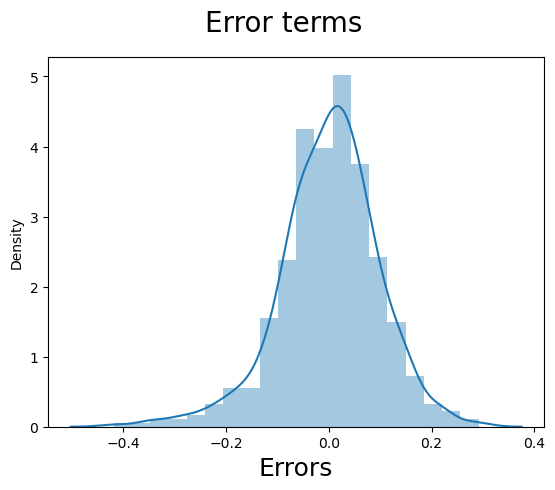

In [1039]:
fig= plt.figure()
sns.distplot((y_train - y_train_cnt), bins= 20 )
fig.suptitle("Error terms ", fontsize = 20)
plt.xlabel("Errors", fontsize= 18)

#### The error terms are normally distributed , this indicates that the model is a good one

## Making predictions on the test set 

#### Applying the scaling on test data set

In [1040]:
num_vars = ["temp", "atemp" , "hum" , "windspeed" , "day_number", "cnt"]

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test 

In [1041]:
y_test = df_test.pop('cnt')
X_test = df_test

#### Now using the model to make predictions on the test data

In [1042]:
# Creating a new X_test dataframe by dropping the eliminated columns 


X_test_new = X_test[X_train_new.columns]

# Adding a constant
X_test_new = sm.add_constant(X_test_new)

In [1043]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

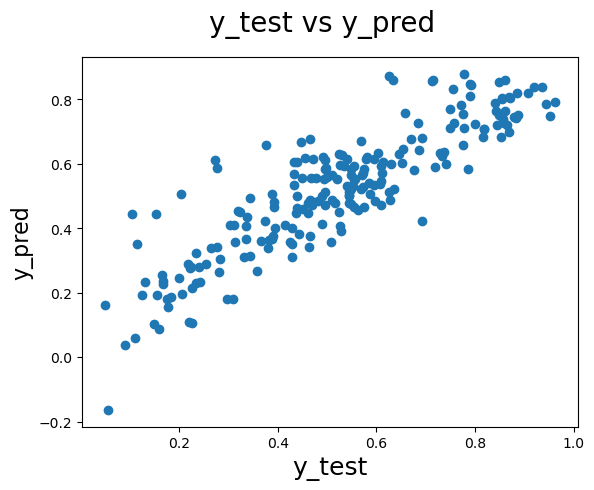

In [1044]:
# Plotting  y_test and y_pred  to understand  the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize= 20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

## Calculating the R-squared score on the test set

In [1045]:
r2_score(y_test, y_pred)

0.7693243161001955

#### The R_squared value of test set which is 76.9% is similar to that of the model's R_squared value which is 81.3%


## Conclusion 

#### The demand for shared bikes is good during winter and and around the month of september .
#### It is also good when the weather situation is not extreme like during clear sky and no signs of rain.
#### It is recommended for Boombikes to promote their brand around this time and gain popularity so that customers choose them 
#### when they are in need to rent a shared bike. 